<a href="https://colab.research.google.com/github/aadhil96/Malaria_Cell_Classification_with_ResNet50/blob/main/Malaria_Cell_Classification_with_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria_Cell_Classification_with_ResNet50**

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aadhilimam","key":"5229a84b438c67382805cf0403396ae9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 657M/675M [00:07<00:00, 90.9MB/s]
100% 675M/675M [00:07<00:00, 97.3MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import fnmatch
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
import os
from tensorflow.keras import layers 
from tensorflow.keras import Model

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.rcParams['figure.figsize'] = (12,7)

In [20]:
print(os.listdir("/content/files/cell_images"))

['Uninfected', 'Parasitized', 'cell_images']


In [21]:
# Setting paths and showing the number of images
infected = os.listdir("/content/files/cell_images/Parasitized")
infected_path = "/content/files/cell_images/Parasitized"
print("Length of infected data = ", len(infected), 'images')
uninfected = os.listdir("/content/files/cell_images/Uninfected")
uninfected_path = "/content/files/cell_images/Uninfected"
print("Length of uninfected data = ", len(uninfected), 'images')

Length of infected data =  13780 images
Length of uninfected data =  13780 images


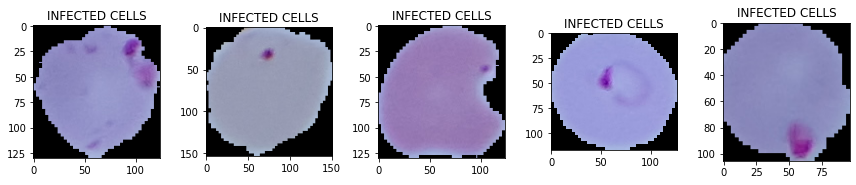

In [22]:
# Infected cells

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(infected_path + '/' + infected[i]))
    plt.title('INFECTED CELLS')
    plt.tight_layout()
plt.show()

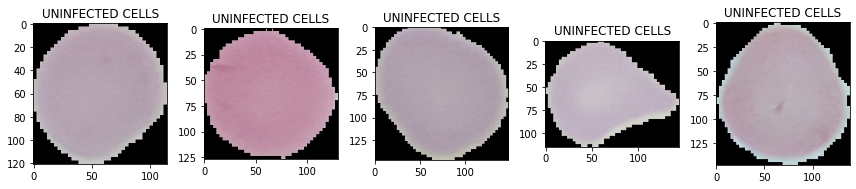

In [23]:
# Uninfected cells

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(uninfected_path + '/' + uninfected[i]))
    plt.title('UNINFECTED CELLS')
    plt.tight_layout()
plt.show()

In [25]:
# Defining Image Data Gen

img_shape = (130, 130, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [26]:
train = image_gen.flow_from_directory('/content/files/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode = 'rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'training',
                                     shuffle = True)

validation = image_gen.flow_from_directory('/content/files/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode ='rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'validation',
                                     shuffle = False)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [27]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [28]:
for layer in base_model.layers:
    layer.trainable = False

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [30]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [31]:
resnet_history = base_model.fit(train, validation_data = validation, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 50s 462ms/step - loss: 1.1138 - acc: 0.6574 - val_loss: 2.1747 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 45s 452ms/step - loss: 0.5821 - acc: 0.8198 - val_loss: 0.8614 - val_acc: 0.4904
Epoch 3/10
100/100 [==============================] - 45s 448ms/step - loss: 0.4552 - acc: 0.8594 - val_loss: 0.9314 - val_acc: 0.5169
Epoch 4/10
100/100 [==============================] - 45s 448ms/step - loss: 0.3898 - acc: 0.8745 - val_loss: 1.7272 - val_acc: 0.5065
Epoch 5/10
100/100 [==============================] - 44s 446ms/step - loss: 0.3743 - acc: 0.8962 - val_loss: 2.2007 - val_acc: 0.5083
Epoch 6/10
100/100 [==============================] - 44s 443ms/step - loss: 0.3716 - acc: 0.8955 - val_loss: 2.3877 - val_acc: 0.5180
Epoch 7/10
100/100 [==============================] - 44s 444ms/step - loss: 0.3038 - acc: 0.9079 - val_loss: 1.9252 - val_acc: 0.5559
Epoch 8/10
100/100 [==============================] - 4

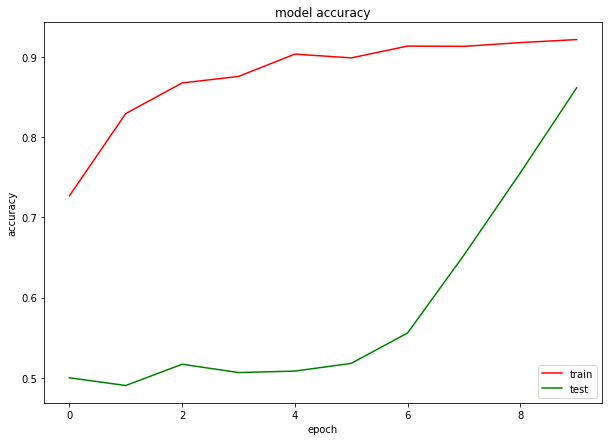

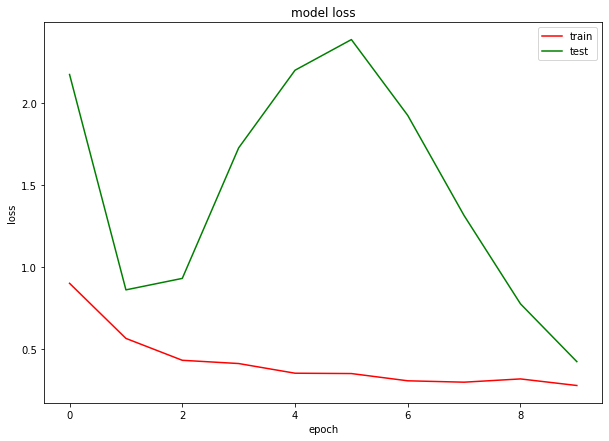

In [32]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(resnet_history.history['acc'], color='red')
ax.plot(resnet_history.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(resnet_history.history['loss'], color='red')
ax.plot(resnet_history.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()